## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = mouse_metadata.merge(study_results, how = 'outer', on = "Mouse ID")

# Display the data table for preview
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
output = merged_df.to_csv('merged_df.csv', index = True)

In [3]:
# Checking the number of mice.
merged_df['Mouse ID'].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_df.duplicated(['Mouse ID','Timepoint'])


In [5]:
#Optional: Get all the data for the duplicate mouse ID. 
merged_df[duplicates]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df["Mouse ID"].value_counts())

249

## Summary Statistics

In [8]:
groupedby_drug_regime = cleaned_df.groupby("Drug Regimen")

groupedby_drug_regime.count()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,156,156,156,156,156,156,156
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Creating series for mean
mean_tumor_volume = groupedby_drug_regime["Tumor Volume (mm3)"].mean()

mean_tumor_volume

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [10]:
#Creating series for median

median_tumor_volume = groupedby_drug_regime["Tumor Volume (mm3)"].median()

median_tumor_volume

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [11]:
#Creating series for variance

variance_tumor_volume = groupedby_drug_regime["Tumor Volume (mm3)"].var()

variance_tumor_volume

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [12]:
#Creating series for SD

SDev_tumor_volume = groupedby_drug_regime["Tumor Volume (mm3)"].std()

SDev_tumor_volume

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [13]:
#Creating series for SEM

SEM_tumor_volume = groupedby_drug_regime["Tumor Volume (mm3)"].sem()

SEM_tumor_volume

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Create a DataFrame of frames using a dictionary of lists
summary_stats1 = pd.DataFrame({
    "Mean": mean_tumor_volume,
    "Median": median_tumor_volume,
    "Variance": variance_tumor_volume,
    "Standard Deviation": SDev_tumor_volume,
    "SEM": SEM_tumor_volume
})
summary_stats1

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_stats2 = groupedby_drug_regime["Tumor Volume (mm3)"].describe()

summary_stats2


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,156.0,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

In [16]:
#Creating x and y values as a list
treatment = [x for x in cleaned_df["Drug Regimen"].unique()]
print(treatment)

no_of_mice = [x for x in groupedby_drug_regime.count()["Mouse ID"]]
print(no_of_mice)

['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']
[230, 178, 178, 188, 186, 181, 156, 228, 181, 182]


<AxesSubplot:xlabel='Drug Regimen'>

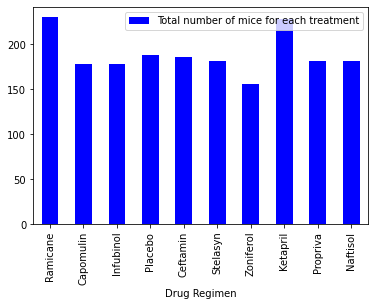

In [17]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

df = pd.DataFrame({'Drug Regimen':treatment, 'Total number of mice for each treatment':no_of_mice})

#Plotting Bar chart
df.plot.bar(x='Drug Regimen', y='Total number of mice for each treatment', color='blue', rot=90)
                                                            

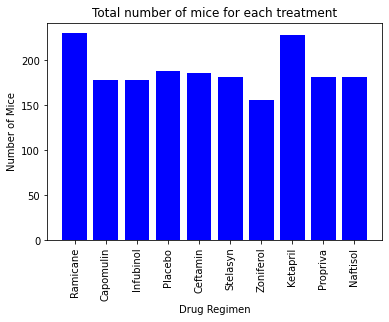

In [18]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#Plotting Bar chart
plt.bar(treatment, no_of_mice, color='blue', align="center")

# Adding labels and a tile
plt.title("Total number of mice for each treatment")
plt.xlabel("Drug Regimen")

#Rotating x labels
plt.xticks(rotation=90)

plt.ylabel("Number of Mice")
plt.show()


In [19]:
#Generating labels and counts values for female and male mice
labels = [x for x in cleaned_df["Sex"].unique()]
count = [x for x in cleaned_df["Sex"].value_counts()]

In [20]:
#Generating Dataframe for creating pie chart using pandas
df_pie = pd.DataFrame({"Number of mice": count},index = labels)
df_pie

,Number of mice
Male,958
Female,930


<AxesSubplot:ylabel='Number of mice'>

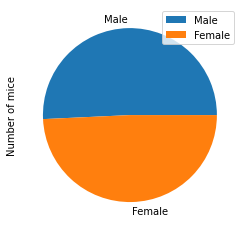

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df_pie.plot.pie(y='Number of mice')


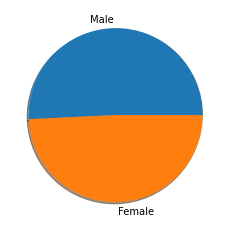

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(count, labels=labels, shadow=True)

# Save an image of our chart and print the final product to the screen

plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

In [24]:
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [25]:
Cpomulin_volume = cleaned_df['Tumor Volume (mm3)'][cleaned_df['Drug Regimen'] == 'Capomulin']

Cpomulin_volume_max = Cpomulin_volume.max()   

Cpomulin_volume_max

#|cleaned_df['Drug Regimen'] == 'Ramicane'| cleaned_df['Drug Regimen'] == 'Infubinol'| cleaned_df['Drug Regimen'] == 'Ceftamin']

48.15820939

In [26]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = cleaned_df.groupby(["Mouse ID"])["Timepoint"].max()
max_timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [27]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_tumor_V = pd.merge(max_timepoint, cleaned_df, on = ["Mouse ID","Timepoint"], how='inner')

merged_tumor_V

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_boxplot = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [52]:
# Create empty list to fill with tumor vol data (for plotting)

tumor_V = []

#locating the rows which contain mice on each drug and get the tumor volumes
for x in treatment_boxplot:
    volume = merged_tumor_V.loc[merged_tumor_V["Drug Regimen"]==x, 'Tumor Volume (mm3)']
    tumor_V.append(volume)
    
    # Calculating the IQR and quantitatively determine if there are any potential outliers. 
    print(x)
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of tumor volume is: {round(lowerq,2)}")
    print(f"The upper quartile of tumor volume is: {round(upperq,2)}")
    print(f"The interquartile range of tumor volume is: {round(iqr,2)}")
    print(f"The the median of tumor volume is: {round(quartiles[0.5],2)} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {round(lower_bound,2)} could be outliers.")
    print(f"Values above {round(upper_bound,2)} could be outliers.\n")
        

Capomulin
The lower quartile of tumor volume is: 32.38
The upper quartile of tumor volume is: 40.16
The interquartile range of tumor volume is: 7.78
The the median of tumor volume is: 38.13 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.

Ramicane
The lower quartile of tumor volume is: 31.56
The upper quartile of tumor volume is: 40.66
The interquartile range of tumor volume is: 9.1
The the median of tumor volume is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.

Infubinol
The lower quartile of tumor volume is: 54.05
The upper quartile of tumor volume is: 65.53
The interquartile range of tumor volume is: 11.48
The the median of tumor volume is: 60.17 
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.

Ceftamin
The lower quartile of tumor volume is: 48.72
The upper quartile of tumor volume is: 64.3
The interquartile range of tumor volume is: 15.58
The the median of tumor volume is: 59.85 
Values b

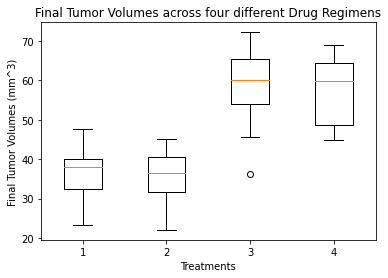

In [30]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes across four different Drug Regimens')
ax1.set_ylabel('Final Tumor Volumes (mm^3)')
ax1.set_xlabel('Treatments')
ax1.boxplot(tumor_V)
plt.show()



## Line and Scatter Plots

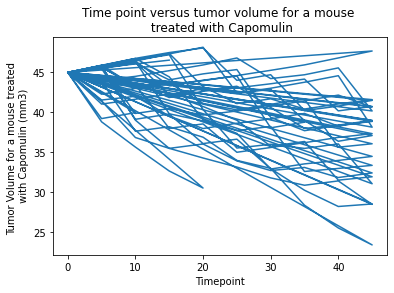

In [69]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

timepoint_capomulin = pd.Series(cleaned_df.loc[[cleaned_df["Drug Regimen"]=='Capomulin',cleaned_df["Mouse ID"]=='Capomulin'], "Timepoint"])
timepoint_capomulin = timepoint_capomulin.tolist()

tumorV_capomulin = pd.Series(cleaned_df.loc[cleaned_df["Drug Regimen"]=='Capomulin', 'Tumor Volume (mm3)'])
tumorV_capomulin = tumorV_capomulin.tolist()


plt.plot(timepoint_capomulin,tumorV_capomulin)
# Give our graph axis labels
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume for a mouse treated \n with Capomulin (mm3)")
plt.title("Time point versus tumor volume for a mouse \n treated with Capomulin")

plt.show()
 

In [73]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = pd.Series(cleaned_df.loc[cleaned_df["Drug Regimen"]=='Capomulin', "Weight (g)"])
mouse_weight = mouse_weight.tolist()
avg_tumorV = .mean()

plt.scatter(mouse_weight,avg_tumorV)
# Give our graph axis labels
plt.xlabel("Weight(g)")
plt.ylabel("Avg Tumor Volume for Capomulin Regimen (mm3)")
plt.title("Mouse weight versus average tumor volume for the Capomulin regimen")

plt.show()

AttributeError: 'list' object has no attribute 'mean'

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(mouse_weight,avg_tumorV)
print(f"The correlation between both factors is {round(correlation[0],2)}")

In [ ]:
slope, intercept, r_value, p_value, std_error = stats.linregress(mouse_weight, avg_tumorV)